 # Challenge 

 ## Etapas

O Desafio será realizado nas seguintes etapas: 

 1. Conexão ao banco e exploração dos dados brutos
 2. Definição do objetivo, criação de perguntas-guias e criação das queries de consulta ao banco de dados
 4. Criação do Dashboad
 5. Análise das métricas e conclusão

## Ferramentas utilizadas

 1. SQL
 2. R
 3. Tableau

Para realizar este desafio escolhi tabalhar com SQL consultas e transformação dos dados e Tableau para visualização.
O programa R será utilizado para conectar ao banco e permitir que as tabelas geradas pelas queries estejam disponíveis para visualização aqui

## Conectar ao banco de dados

Instalar  RpostgreSQL 

In [22]:
install.packages("RPostgreSQL")
install.packages("DBI")

Warning message:
"package 'RPostgreSQL' is in use and will not be installed"Warning message:
"package 'DBI' is in use and will not be installed"

Entrar com as credenciais no banco de dados

In [23]:
library("RPostgreSQL")

In [24]:
#database connection

dsn_database = "challenge"           
dsn_hostname = "challenge-99.cdu4dk9fjcht.us-east-1.rds.amazonaws.com" 
dsn_port = "5432"                
dsn_uid = "candidate"       
dsn_pwd = "99rules"      

In [25]:
# estabelecer conexao

tryCatch({
    drv <- dbDriver("PostgreSQL")
    print("Connecting to database")
    conn <- dbConnect(drv, 
                 dbname = dsn_database,
                 host = dsn_hostname, 
                 port = dsn_port,
                 user = dsn_uid, 
                 password = dsn_pwd)
    print("Connected!")
    },
    error=function(cond) {
            print("Unable to connect to database.")
    })

[1] "Connecting to database"
[1] "Connected!"


## Explorar tabelas do banco de dados

Agora que a conexão foi estabelecida, vou observar as variaveis de cada tabela
1.trips 
2.orders

In [26]:
#observar as variaveis da tabela trips

dbGetQuery(conn, "SELECT * FROM trips limit 10")

order_id,pickup_datetime,dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,tip_amount,total_amount,passenger_id,driver_id
14362473,2014-04-20 10:42:57,2014-04-20 10:49:06,0.90,-73.97484,40.75942,1,-73.98035,40.76969,CRD,6.0,1.30,7.80,5.234568e+15,5.234568e+15
12034238,2014-04-02 11:52:00,2014-04-02 12:08:00,1.98,-73.99130,40.75568,1,-73.98834,40.74209,CRD,11.5,2.30,14.30,5.234568e+15,5.234568e+15
5458856,2014-04-18 09:47:00,2014-04-18 10:00:00,2.57,-73.97969,40.78952,1,-73.96326,40.76593,CRD,11.5,2.00,14.00,5.234568e+15,5.234568e+15
3287441,2014-03-25 14:38:00,2014-03-25 15:00:00,4.44,-73.97321,40.75115,1,-73.96723,40.80206,CRD,17.5,4.38,22.38,5.234568e+15,5.234568e+15
5248138,2014-04-15 10:44:00,2014-04-15 11:08:00,4.22,-73.95974,40.76010,1,-73.99899,40.73639,CRD,18.5,2.50,21.50,5.234568e+15,5.234568e+15
2548526,2014-03-16 15:08:00,2014-03-16 15:17:00,1.73,-73.99321,40.72218,1,-73.97922,40.74430,CRD,8.5,2.12,11.12,5.234568e+15,5.234568e+15
734111,2014-05-24 15:55:38,2014-05-24 16:03:46,0.80,-73.98912,40.72146,1,-73.99887,40.72288,CRD,7.0,1.00,8.50,5.234568e+15,5.234568e+15
8476403,2014-03-01 13:47:00,2014-03-01 13:50:00,0.60,-73.97505,40.76152,1,-73.97314,40.75557,CSH,4.0,0.00,4.50,5.234568e+15,5.234568e+15
7599677,2014-04-23 22:48:16,2014-04-23 22:57:43,2.60,-73.97044,40.75866,1,-73.94467,40.77953,CRD,10.0,2.20,13.20,5.234568e+15,5.234568e+15
8367496,2014-05-23 17:08:41,2014-05-23 17:23:41,1.80,-73.98120,40.77408,1,-73.97829,40.75397,CSH,11.0,0.00,12.50,5.234568e+15,5.234568e+15


In [27]:
# observar variaveis da tabela orders

dbGetQuery(conn, "SELECT * FROM orders limit 10")

order_id,passenger_id,pickup_datetime,pickup_longitude,pickup_latitude,payment_type
5942353,5.234568e+15,2014-04-26 11:00:00,-73.96506,40.76652,CRD
5942354,5.234568e+15,2014-04-26 11:01:00,-73.99757,40.73639,CSH
5942355,5.234568e+15,2014-04-26 12:12:00,-73.98696,40.75985,CSH
5942356,5.234568e+15,2014-04-26 11:56:00,-73.97683,40.73928,CRD
5942357,5.234568e+15,2014-04-26 13:39:00,-73.96052,40.79747,CRD
5942358,5.234568e+15,2014-04-26 11:33:00,-73.98935,40.75861,CSH
5942359,5.234568e+15,2014-04-26 11:29:00,-73.97151,40.75644,CRD
5942360,5.234568e+15,2014-04-26 11:34:00,-73.97638,40.73983,CRD
5942361,5.234568e+15,2014-04-26 11:44:00,-73.97129,40.74681,CRD
5942362,5.234568e+15,2014-04-26 11:44:00,-73.98376,40.73809,CSH


In [28]:
# Estabelecer a relação entre as tabelas e o numero total de observações em cada uma 


dbGetQuery(conn,"select 
                        count(o.order_id)  as contagem_orders,
                        count(t.order_id)  as contagem_trips
                        from orders o 
                        left join  trips t on t.order_id=o.order_id")


contagem_orders,contagem_trips
1.5e+07,11456987


A relação é feita pelo order_id de cada tabela 

A tabela *orders* possui mais de 15M de observações enquanto a tabela *trips* possui 11M 
isso significa que na tabela orders está o número de todas as viagens solicitadas a trips possui o número de viagens realizadas


 ## Criação de métricas

Após realizar a conexão com o banco e entender as variáveis em cada tabela, se inicia o processo exploração 
e criação de indicadores

Para isso preciso partir dos objetivos estratégicos da empresa que é ser líder no mercado oferendo o menor preço e a melhor qualidade de serviço para o passageiro. 

Com base nos objetivos da empresa, os macros indicadores  que devem ser analisados são: performance, receita,operação/capacidade


Esse macros indicadores geram algumas perguntas a serem respondidas por meio dos dados

*Performance

 * Estamos apresentando crescimento no numero de corridas?
 * Quantos clientes temos ativos na base?
 * O cliente está fidelizado?
 * Estamos aumentando/diminuindo o numero de conversões ao longo do tempo?

*Receita

 * A receita está evoluindo?
 * Quais canais/produtos tem contribuido para aviação na receita?
 * Quanto cada corrida gera de valor em média?

*Operação/capacidade de atendimento

 * Consigo saber onde as viagens estão concentradas?
 * Quais são os horários de pico?
 * Em média, quanto tempo duram as viagens? Isso varia com o horário?
 * Qual o preço que meu cliente para por milhas percorridas?

 ## Métricas de performance



 1. Número de corridas  - volume demandado do serviço, esse indicador ajuda a entender se há crescimento no negócio
 
 2. Passageiros ativos  - Crescimento da base de clientes
 
 3. Fidelização - estratégia de fidelização ou de atração a depender de quantas vezes o passageiro utilizou o serviço
 
 4. Taxa de conversão  - Quão eficiente está sendo o serviço ( nesse caso não há dados do motivo da disitência das outras                                 corridas)
 
 

In [30]:
# corridas diarias - quantidade total de corridas realizadas
# Essa query faz a contagem de order_id aberto por dias

dbGetQuery(conn," -- corridas por dia
                 select date_trunc('day', pickup_datetime )::date as  date,
                        count(order_id)  as corridas
                 from trips
                 group by 1
                  limit 10        ")



# Passageiros ativos - contagem de clientes unicos  que realizaram uma corrida no mês
# contagem distinta do passeger_id aberto por dia 

dbGetQuery(conn," -- passageiros ativos por dia
                  select date_trunc('day',pickup_datetime )::date as date ,
                         count(distinct passenger_id ) as passageiros
                   from trips t 
                   group by 1
                   limit 10          ") 



# Fidelizacao -  Quantidade de corridas realizadas por cliente
# primiero realizo a contagem de order_id por passager_id para saber o numero de corridas pelo passager_id
#depois trabalho com o case when para definir o bin que gostaria de observar e finalmente a contagem de passager_id 

dbGetQuery(conn," -- contagem de passageiros por quantidade de corridas
                select 
                        case when viagens between 1 and 2 then       ' 1 a 2'
                             when viagens between 3 and 5 then       ' 3 a 5'
                             when viagens between 6 and 10 then      ' 6 a 10'
                             when viagens between 11 and 20 then     ' 11 a 20'
                             when viagens between 21 and 30 then     ' 21 a 30'
                             when viagens between 31 and 40 then     ' 31 a 40'
                             when viagens between 41 and 50 then     ' 41 a 50'
                             when viagens between 51 and 80 then     ' 51 a 80'
                             when viagens  between 81 and 100 then   '81 a 100'
                             when viagens  between  101 and 120 then '101 a 120'
                             when viagens  between  121 and 150 then '121 a 150'
                             when viagens  between  151 and 180 then '151 a 180'
                             when viagens  >180 then 'mais180' 
                                                     end  as faixa, 
                            count (a.passenger_id) passageiros
              from
                 (     select
                            distinct  passenger_id ,
                            count (order_id) as viagens
                      from trips
                      group by 1
                            )a
             group by 1
             limit 10          ")



# Taxa de conversão - clientes que realizaram a corrida / total de clientes solicitando corrida
 # Left join na tabela trips para somar todos os passagerios que solicitaram viagem( mesmo que não tenha realizado)
 # em seguida contagem de order_id na tabela orders e contagem na tabela trips

dbGetQuery(conn," -- contagem de viagens solicitadas / contagem de viagens realizadas
                select 
                       date_trunc('day',o.pickup_datetime)::date as date ,
                       count(o.order_id ) as viagens_solicitadas,
                       count(t.order_id ) as viagens_realizadas,
                       count(t.order_id )::numeric /count(o.order_id )::numeric as taxa_conversao
                 from 
                      orders o 
                left join trips  t on t.order_id =o.order_id 
                group by 1
                  limit 10 ")
           


date,corridas
2014-03-01,211548
2014-03-02,176559
2014-03-03,177636
2014-03-04,190532
2014-03-05,194010
2014-03-06,202838
2014-03-07,209024
2014-03-08,210517
2014-03-09,180526
2014-03-10,168515


date,passageiros
2014-03-01,148794
2014-03-02,129229
2014-03-03,129678
2014-03-04,137312
2014-03-05,139129
2014-03-06,143949
2014-03-07,147816
2014-03-08,148341
2014-03-09,131494
2014-03-10,124660


faixa,passageiros
81 a 100,4325
151 a 180,34
121 a 150,14953
1 a 2,4384757
6 a 10,115
101 a 120,30669
51 a 80,19
3 a 5,152052


date,viagens_solicitadas,viagens_realizadas,taxa_conversao
2014-03-01,277284,211548,0.7629290
2014-03-02,231264,176559,0.7634522
2014-03-03,232098,177636,0.7653491
2014-03-04,249604,190532,0.7633371
2014-03-05,254288,194010,0.7629538
2014-03-06,265404,202838,0.7642613
2014-03-07,273812,209024,0.7633851
2014-03-08,275816,210517,0.7632516
2014-03-09,236618,180526,0.7629428
2014-03-10,220990,168515,0.7625458


 ## Métricas de receita

As métricas de receita ajudaram a entender a sustentabilidade do negócio.

 1. Receita total - Avaliar a sustentabilidade financeira
 
 2. Receita por forma de pagamento  - Qual o percentual de dependencia que a receita tem em relação a um meio de pagamento
 
 3. Receita por bandeira -  Qual gera maior tkt médio
 
 4. Ticket médio  - Valor gerado por cada passageiro/viagem. Se o ticket médio estiver baixo, precisará se manter o numero alto                     de corridas para garantir uma boa receita

In [32]:
#receita total
 # soma do valor pago, excluindo o valor de gorjeta 

dbGetQuery(conn," --soma de receita por dia
                 select date_trunc('day', pickup_datetime )::date as  date,
                        sum(fare_amount) as receita
                 from  trips 
                 group by 1
limit 10")



# receita por forma de pagamento
 # primeiro criei uma tabela auxiliar para somar o valor de receita total
 # depois criei a query que calcula a receita aberta por mês e tipo de pagamento
 #  é feito um join por data com a tabela auxiliar para poder calcular o percentual do total de cada forma de pagamento

dbGetQuery(conn," -- soma da receita por forma de pagamento
                 with receita as (
                                   select date_trunc( 'month',pickup_datetime )::date date,
                                          round(sum(fare_amount)::integer,2) as receita
                                   from trips t 
                                   group by 1
 )
  select 
        date_trunc('month', pickup_datetime)::date  as  date,
        payment_type,
        r.receita as receita_total,
        round(sum(fare_amount)::integer,2)  as receita,
        round((round(sum(fare_amount)::integer,2) / r.receita),5) as percuntal_receita_mes
 from  trips t 
 join receita r  on r.date = date_trunc('month', t.pickup_datetime)::date
 group by 1,2,3
limit 10")


# receita por bandeira
 # mesmo que o anterior, subistintuindo a coluna payment_type por rate_code

dbGetQuery(conn," --soma da receita por bandeira
                with receita as (
                                   select date_trunc( 'month',pickup_datetime )::date date,
                                          round(sum(fare_amount)::integer,2) as receita
                                   from trips t 
                                   group by 1
 )
  select 
        date_trunc('month', pickup_datetime)::date  as  date,
        rate_code,
        r.receita as receita_total,
        round(sum(fare_amount)::integer,2)  as receita,
        round((round(sum(fare_amount)::integer,2) / r.receita),5) as percuntal_receita_mes
 from  trips t 
 join receita r  on r.date = date_trunc('month', t.pickup_datetime)::date
 group by 1,2,3
limit 10")



# Ticket médio por corridas - passageiros
   #soma dad receita dividido pela contagem distinta de passageiros e contagem de order_id

dbGetQuery(conn," -- soma da receita / contagem unica de passageiros
                 select date_trunc('month', pickup_datetime)::date as  date,
                        round(sum(fare_amount)::integer,2) as receita,
                        count(order_id) corridas,
                        count(distinct passenger_id) ,
                        round(sum(fare_amount)::integer,2) / count(order_id) as tkt_corridas,
                        round(sum(fare_amount)::integer,2) / count(distinct passenger_id) as tkt_cliente
                from trips 
                group by 1
limit 10")


date,receita
2014-03-01,2508216
2014-03-02,2166266
2014-03-03,2004982
2014-03-04,2248707
2014-03-05,2349331
2014-03-06,2499741
2014-03-07,2573873
2014-03-08,2519669
2014-03-09,2271928
2014-03-10,2069117


date,payment_type,receita_total,receita,percuntal_receita_mes
2014-03-01,CRD,57323444,35245142,0.61485
2014-03-01,CSH,57323444,21608713,0.37696
2014-03-01,DIS,57323444,32932,0.00057
2014-03-01,NOC,57323444,97618,0.00170
2014-03-01,UNK,57323444,339039,0.00591
2014-04-01,CRD,69684834,42184330,0.60536
2014-04-01,CSH,69684834,26955080,0.38681
2014-04-01,DIS,69684834,56987,0.00082
2014-04-01,NOC,69684834,153080,0.00220
2014-04-01,UNK,69684834,335356,0.00481


date,rate_code,receita_total,receita,percuntal_receita_mes
2014-03-01,0,57323444,8711,0.00015
2014-03-01,1,57323444,51751613,0.90280
2014-03-01,2,57323444,4245695,0.07407
2014-03-01,3,57323444,439946,0.00767
2014-03-01,4,57323444,83680,0.00146
2014-03-01,5,57323444,793309,0.01384
2014-03-01,6,57323444,210,0.00000
2014-03-01,8,57323444,54,0.00000
2014-03-01,65,57323444,23,0.00000
2014-03-01,210,57323444,203,0.00000


date,receita,corridas,count,tkt_corridas,tkt_cliente
2014-03-01,57323444,4686895,2170979,12.23058,26.40442
2014-04-01,69684834,5583323,2529867,12.48089,27.54486
2014-05-01,15364905,1186769,626489,12.94684,24.52542


## Métricas de Operação


 1. Preço por milha  - Monitorar picos de demanda e em que momento corre-se o risco de converter menos ou mais dado o valor da                        corrida 
 
 2. Volume de viagens por período  - Em quais momentos a operação sofre maior demanda e também maior oportunidade de ganhos 
 
 3. Demanda por geolocalização   - Onde há necessidade de alocar mais motoristas para atender de forma mais rápida os                                              passageiros

In [33]:

# preço por milhas
  # soma do fare_amount dividido pela soma de trip_distance

dbGetQuery(conn,"  -- preco por milha
                    -- soma da receita / soma da distancia 
                 select 
                      date,
                      rate_code ,
                     (receita/distancia) r_d
                 from (
                        select 
                              date_trunc('day', pickup_datetime)::date date,
                              rate_code ,
                              round(sum(fare_amount)::integer,2) receita,
                              sum(trip_distance ) distancia,
                              count(passenger_id ) passageiros
                        from trips 
                        group by 1,2
                     )a
limit 10")



# intervalo de tempo por viagem
 # primeiro calculei a diferença em minutos entre dropoff_datetime e pickup_datetime
 # depois criei um bin (tamanho 10) com o valor das diferenças e fiz a contagem de order_id para cada bin

dbGetQuery(conn,"  -- intervalo de tempo por viagem
                   -- diferenca entre dropoff_datetime e pickup_datetime
                select date, 
                         case when time <=10 then '10'
                              when time <=20 then '20'
                              when time <=30 then '30'
                              when time <=40 then '40'
                              when time <=50 then '50'
                              when time <=60 then '60'
                              when time >=61 then '+1hour'
                                                     end as faixa,
                         count(order_id) corridas
                 from 
                        (
                        select 
                              date_trunc('hour',pickup_datetime)::date date,
                              order_id ,
                             ( DATE_PART('hour', dropoff_datetime::timestamp - pickup_datetime::timestamp) * 60 +
                               DATE_PART('minute', dropoff_datetime::timestamp - pickup_datetime::timestamp) )as time
                       from trips 
                        )a
                group by 1,2
limit 10")



# geolocalização - mapa criado diretamnte no Tableau com as variáveis de geolocalização dos clientes
 # criei um union all para conseguir distinguir pontos geograficos  de origem e de destino 

dbGetQuery(conn," -- geolocalizacao
                  select * ,
                         case when ponto ='origem' then 1 
                              else 2 end as ordem
                      from (
                               select o.order_id  order_id,
                                     'origem' as ponto,
                                      o.pickup_latitude  as latitude,
                                      o.pickup_longitude as longitude
                                from orders o
                                left join trips t on t.order_id = o.order_id 
              ------------------------------------------------------------
               union all 
                              select order_id  order_id,
                                     'destino' as ponto,
                                      dropoff_latitude  as latitude,
                                      dropoff_longitude as longitude
                             from trips t 
                            )a
limit 10")

date,rate_code,?column?
2014-03-01,0,3.487179
2014-03-01,1,4.352112
2014-03-01,2,3.085553
2014-03-01,3,4.079655
2014-03-01,4,3.539362
2014-03-01,5,11.047294
2014-03-02,0,2.912088
2014-03-02,1,4.022490
2014-03-02,2,3.068936
2014-03-02,3,3.974279


date,faixa,corridas
2014-03-01,10,114342
2014-03-01,+1hour,307
2014-03-01,20,68600
2014-03-01,30,20177
2014-03-01,40,5536
2014-03-01,50,1927
2014-03-01,60,659
2014-03-02,10,103213
2014-03-02,+1hour,97
2014-03-02,20,53595


order_id,ponto,latitude,longitude,ordem
1140669,origem,40.72108,-74.00855,1
1140689,origem,40.73393,-73.98656,1
1140912,origem,40.76287,-73.97936,1
1141009,origem,40.73199,-73.99022,1
1141045,origem,40.75784,-73.97845,1
1141509,origem,40.75950,-73.98036,1
1142046,origem,40.72530,-73.99632,1
1142453,origem,40.76229,-73.97123,1
1142526,origem,40.78474,-73.95614,1
1142717,origem,40.72118,-73.99371,1


## Visualização dos dados - Dashboard

Para visualizar o dashboard no Tableau Public [clique aqui](https://public.tableau.com/profile/hully6961#!/vizhome/challenge2v/ChallengeDashboard?publish=yes)

## Análise final e conclusão

Performance

Maio apresenta queda no número de corridas, uma diferença de quase 90% comparado ao mês anterior. Em  parte pode ser explicado pela variação da taxa de conversão nesse mês,outros motivos seriam a presença de nova concorrência,preço de viagens mais caras por conta do aumento dos custos, mas faltam dados para uma conclusão. 

No gráfico também é apresentado a frequência de corridas Percebe-se que maior parte da base realizou apenas entre 1 a 2 viagens. 

É preciso criar um plano estratégico para fidelizar clientes e aumentar a frequência com que o serviço é utilizado, isso pode proporcionar também o aumento de corridas e clientes ativos.


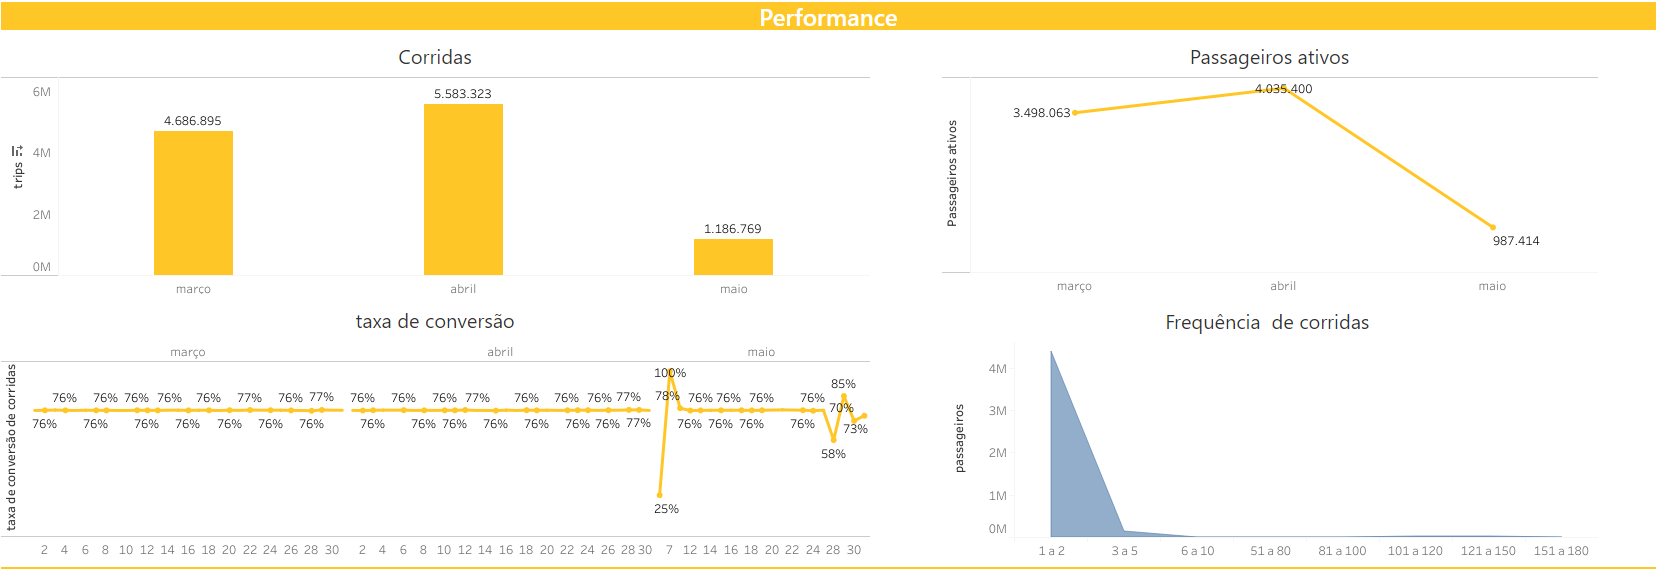

Receita

Como resultado na queda de corridas, a receita também é impactada (menor resultado do trimestre)
Quando observada por bandeira (produto), 90% é proveniente de *standart rate* que também gera menor ticket ,$11, por viagem tornando o produto muito menos rentável em comparação com JFK,$52 (segundo em representatividade da receita).

O ticket médio variou pouco, alcançando o pico de $10 em Maio, atenuando os efeitos negativos da queda de clientes ativos.

É preciso manter ticket médio e explorar retenção de clientes, principalmente daqueles que utilizam  serviços com maior ganho médio.

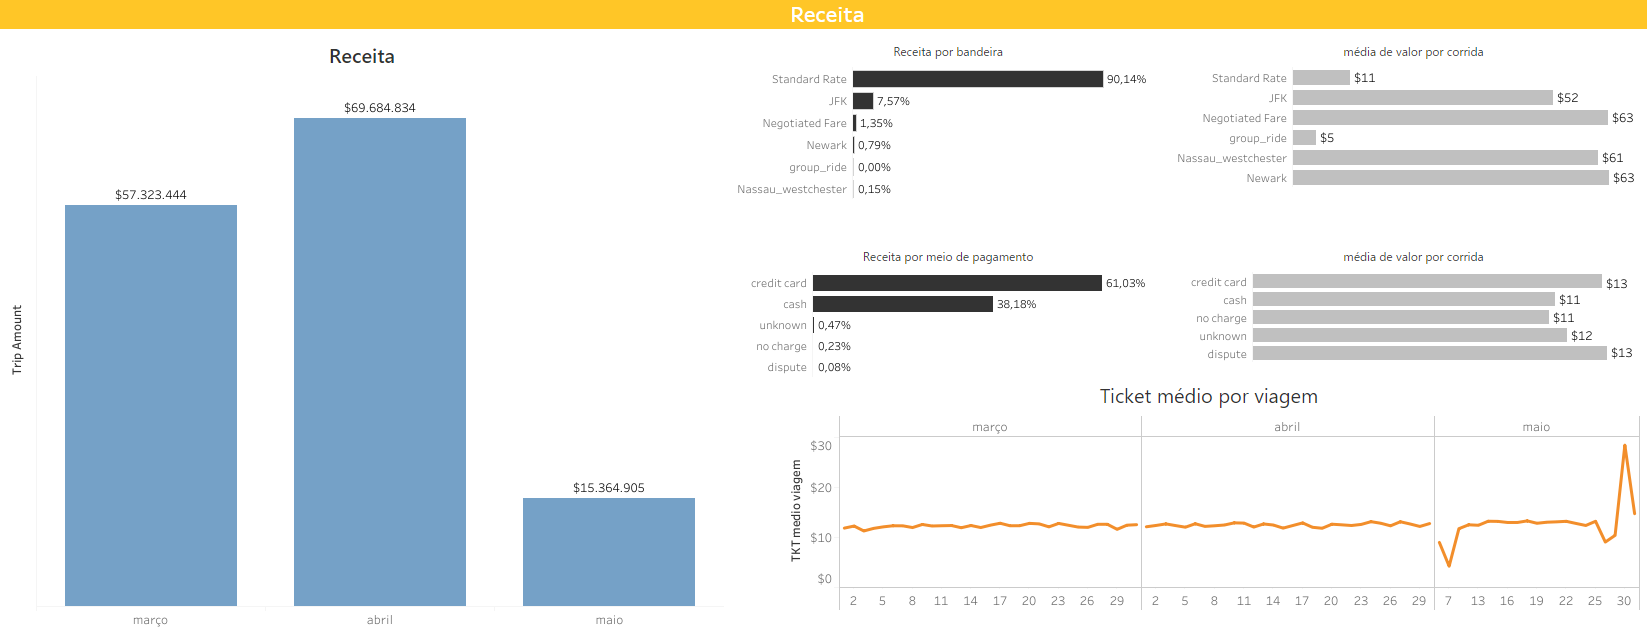

Operação

Para ter qualidade e atender de forma rápida, é necessário estar focado nos horários de maior movimento e traçar estratégias competitivas tanto em questão de preço/milha quanto na questão de alocação dos motoristas que estão pela cidade.

Alocação acertivas podem ser feitas com base nos horários de pico. 
Também é possível criar melhorias no aplicativo em relação aos motoristas (oferta e demanda) conforme o volume de chamadas por região.
Além disso, observando que o tempo médio de corridas está entre 10 e 20 minutos, novos produtos podem ser criados como mini viagens a preços competitivos.


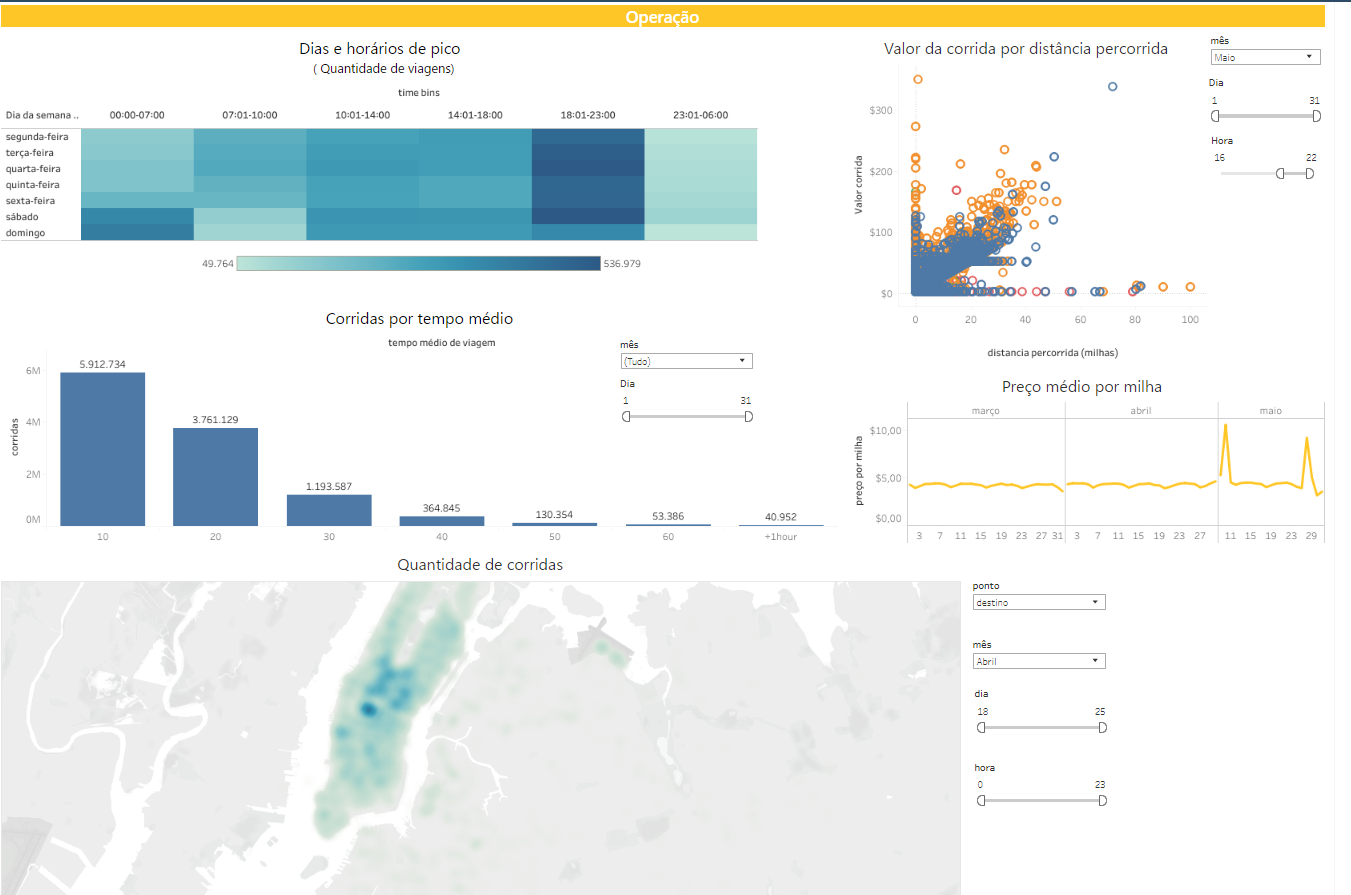